Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5564 - loss: 4.1219 - val_accuracy: 0.5125 - val_loss: 0.9420
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7246 - loss: 3.1099 - val_accuracy: 0.5250 - val_loss: 0.7911
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7625 - loss: 2.8867 - val_accuracy: 0.5375 - val_loss: 0.7958
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8450 - loss: 1.4865 - val_accuracy: 0.5250 - val_loss: 0.8842
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8978 - loss: 0.7585 - val_accuracy: 0.5625 - val_loss: 0.8500


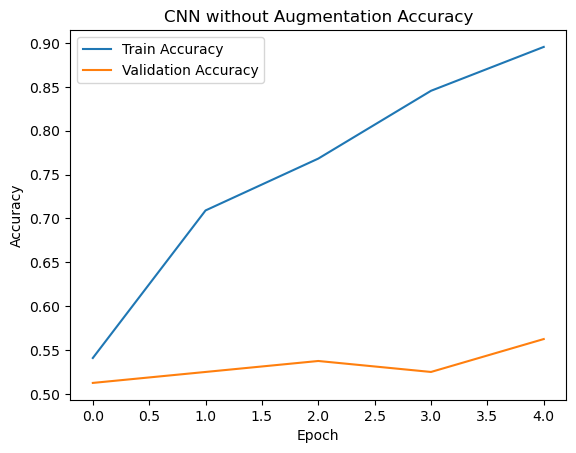

Final Training Accuracy: 0.90
Final Validation Accuracy: 0.56


In [ ]:
# 1.自行建構、訓練 CNN 模型，衡量模型預測績效

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

# parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# data preparation (No Augmentation)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# build custom CNN model
def build_custom_cnn():
    model = Sequential([
        Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2,2)),
        BatchNormalization(),

        Conv2D(64, (3,3), strides=(1,1), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# training Function with Plot
def train_model_and_plot(model, train_data, val_data, title):
    history = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[EarlyStopping(patience=3)], verbose=1)

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {train_acc:.2f}")
    print(f"Final Validation Accuracy: {val_acc:.2f}")

# train model without augmentation
model_no_aug = build_custom_cnn()
train_model_and_plot(model_no_aug, train_generator, val_generator, 'CNN without Augmentation')

Found 220 images belonging to 2 classes.


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.4224 - loss: 7.2901 - val_accuracy: 0.5250 - val_loss: 0.7890
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5819 - loss: 4.3688 - val_accuracy: 0.5625 - val_loss: 0.8926
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6314 - loss: 3.6828 - val_accuracy: 0.5125 - val_loss: 0.7691
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6169 - loss: 2.4581 - val_accuracy: 0.5375 - val_loss: 0.9783
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6555 - loss: 2.1550 - val_accuracy: 0.5625 - val_loss: 0.6976
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6796 - loss: 1.5220 - val_accuracy: 0.5625 - val_loss: 0.6747
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7249 - loss: 1.0539 - val_accuracy: 0.5750 - val_loss: 0.6696
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7298 - loss: 0.9783 - val_accuracy: 0.6000 - val_loss: 0.6724
Epoch 9/

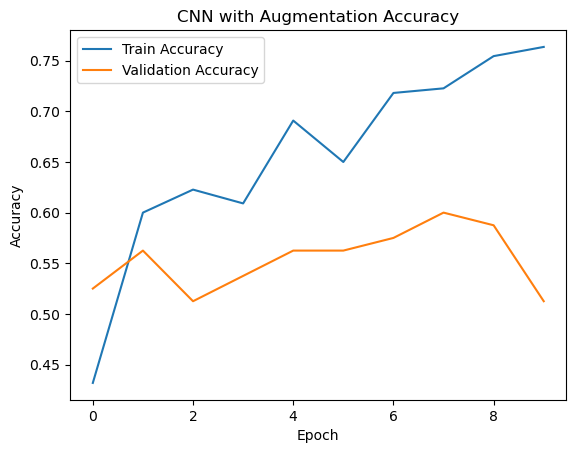

Final Training Accuracy: 0.76
Final Validation Accuracy: 0.51


In [ ]:
#2.使用資料增強(data augmentation)技術，觀察可否提升模型預測績效？

# data preparation with augmentation
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

aug_train_generator = aug_train_datagen.flow_from_directory(
    'dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# train model with augmentation e
model_with_aug = build_custom_cnn()
train_model_and_plot(model_with_aug, aug_train_generator, val_generator, 'CNN with Augmentation')